
Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.metrics import plot_roc_curve 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# 
These are the categorical columns in the given dataset

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

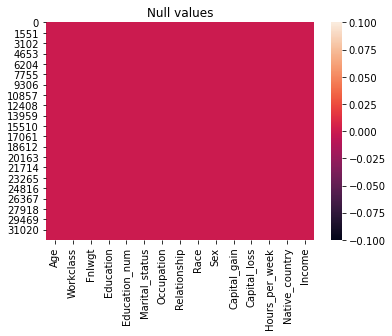

In [7]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

<AxesSubplot:xlabel='count', ylabel='Workclass'>

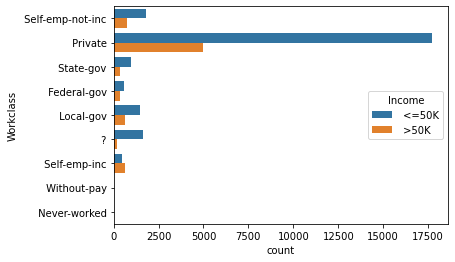

In [8]:
sns.countplot(y='Workclass', hue='Income', data = df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

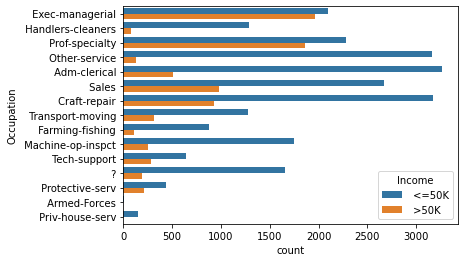

In [9]:
sns.countplot(y='Occupation', hue='Income', data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

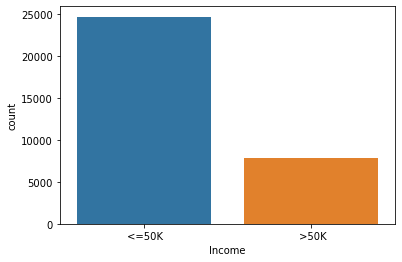

In [10]:
sns.countplot(x='Income', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

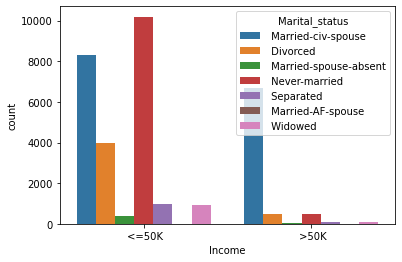

In [11]:
sns.countplot(x='Income', hue='Marital_status', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

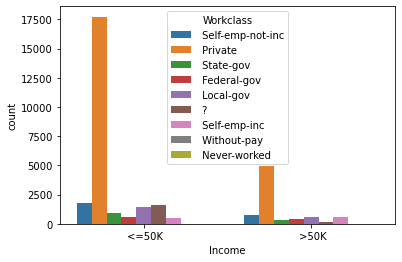

In [12]:
sns.countplot(x='Income', hue='Workclass', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

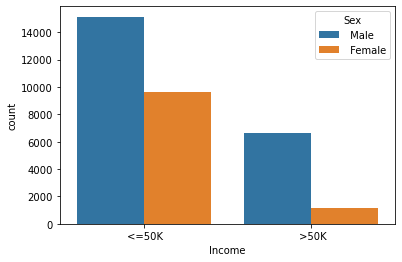

In [13]:
sns.countplot(x='Income', hue='Sex', data=df)

<AxesSubplot:xlabel='Age'>

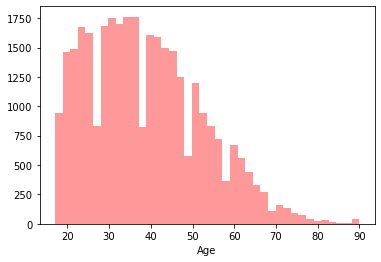

In [14]:
sns.distplot(df['Age'].dropna(), kde=False, color='red', bins=40)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Age'>

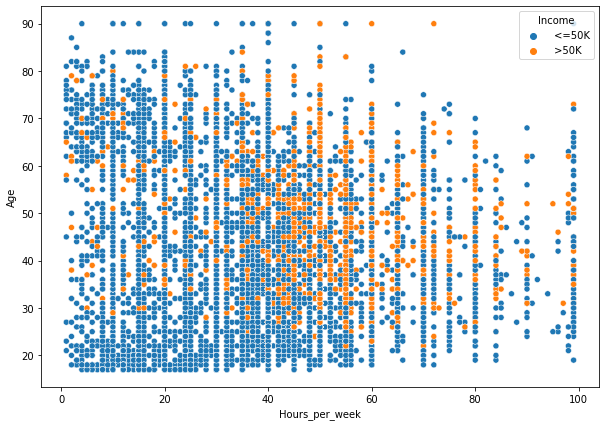

In [15]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=df['Hours_per_week'], y=df['Age'], hue=df['Income'])

<AxesSubplot:xlabel='Income', ylabel='count'>

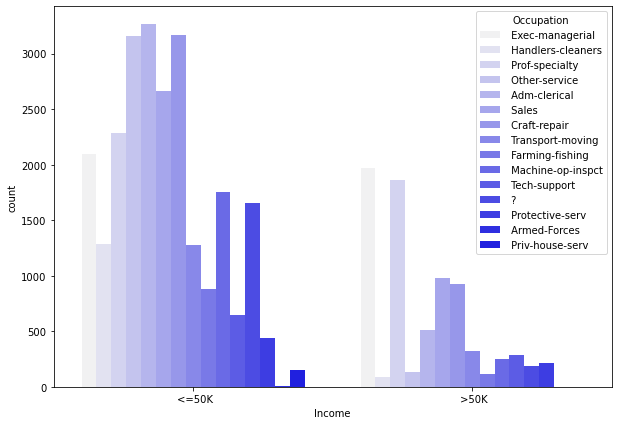

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='Income', hue='Occupation', data=df, color='blue')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


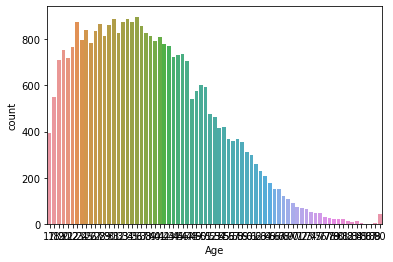

In [17]:
print(df["Age"].value_counts())
sns.countplot(df["Age"])
plt.show()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


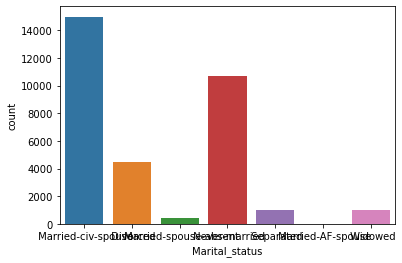

In [18]:
print(df["Marital_status"].value_counts())
sns.countplot(df["Marital_status"])
plt.show()

In [19]:
print(df.corr())

                     Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076646       0.036527      0.077674      0.057775   
Fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
Education_num   0.036527 -0.043159       1.000000      0.122627      0.079932   
Capital_gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
Capital_loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
Hours_per_week  0.068756 -0.018770       0.148127      0.078409      0.054256   

                Hours_per_week  
Age                   0.068756  
Fnlwgt               -0.018770  
Education_num         0.148127  
Capital_gain          0.078409  
Capital_loss          0.054256  
Hours_per_week        1.000000  


<function matplotlib.pyplot.show(close=None, block=None)>

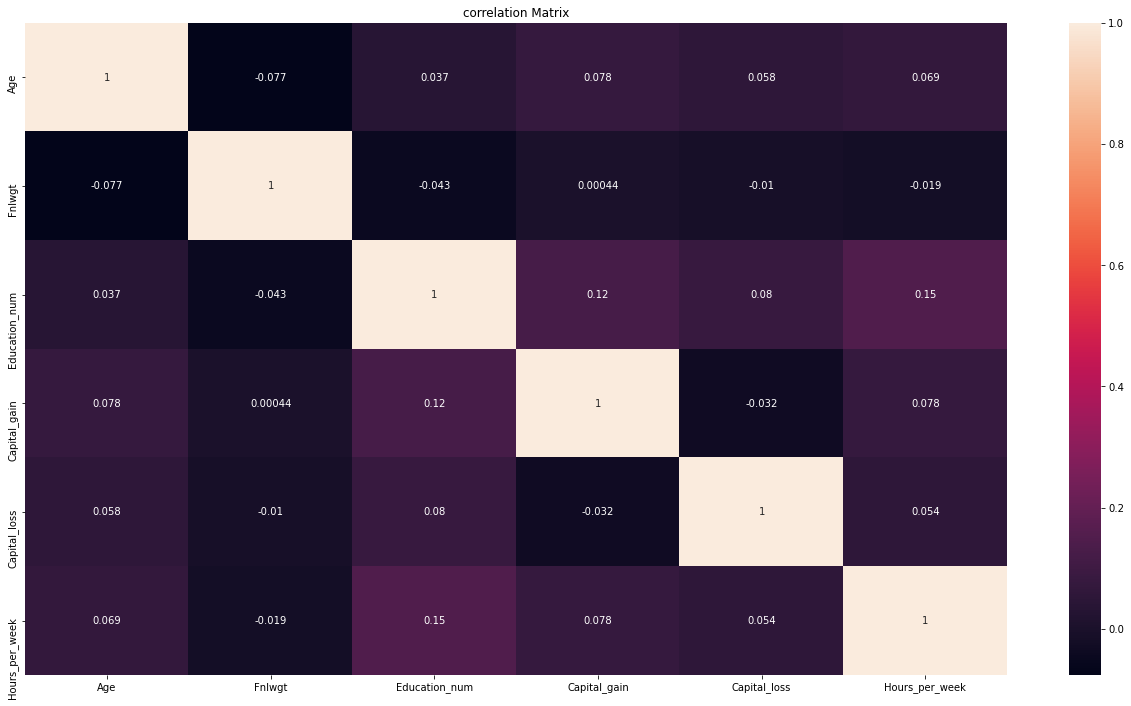

In [20]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

In [21]:
corr_matrix=df.corr()
corr_matrix["Capital_gain"].sort_values(ascending=False)

Capital_gain      1.000000
Education_num     0.122627
Hours_per_week    0.078409
Age               0.077674
Fnlwgt            0.000437
Capital_loss     -0.031614
Name: Capital_gain, dtype: float64

In [22]:
df = df.apply(LabelEncoder().fit_transform)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,11,8,4,1,3,4,1,0,0,19,39,0


In [23]:
x=df.drop('Capital_gain', axis=1)
y=df['Capital_gain']

In [24]:
x.skew()

Age               0.555583
Workclass        -0.752280
Fnlwgt            0.063137
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_loss      5.266058
Hours_per_week    0.069753
Native_country   -3.658235
Income            1.212383
dtype: float64

In [25]:
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [26]:
x.skew()

Age              -0.104049
Workclass         0.061629
Fnlwgt           -0.263791
Education        -0.309431
Education_num     0.019545
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_loss      4.299512
Hours_per_week    0.199586
Native_country   -2.725467
Income            1.212383
dtype: float64

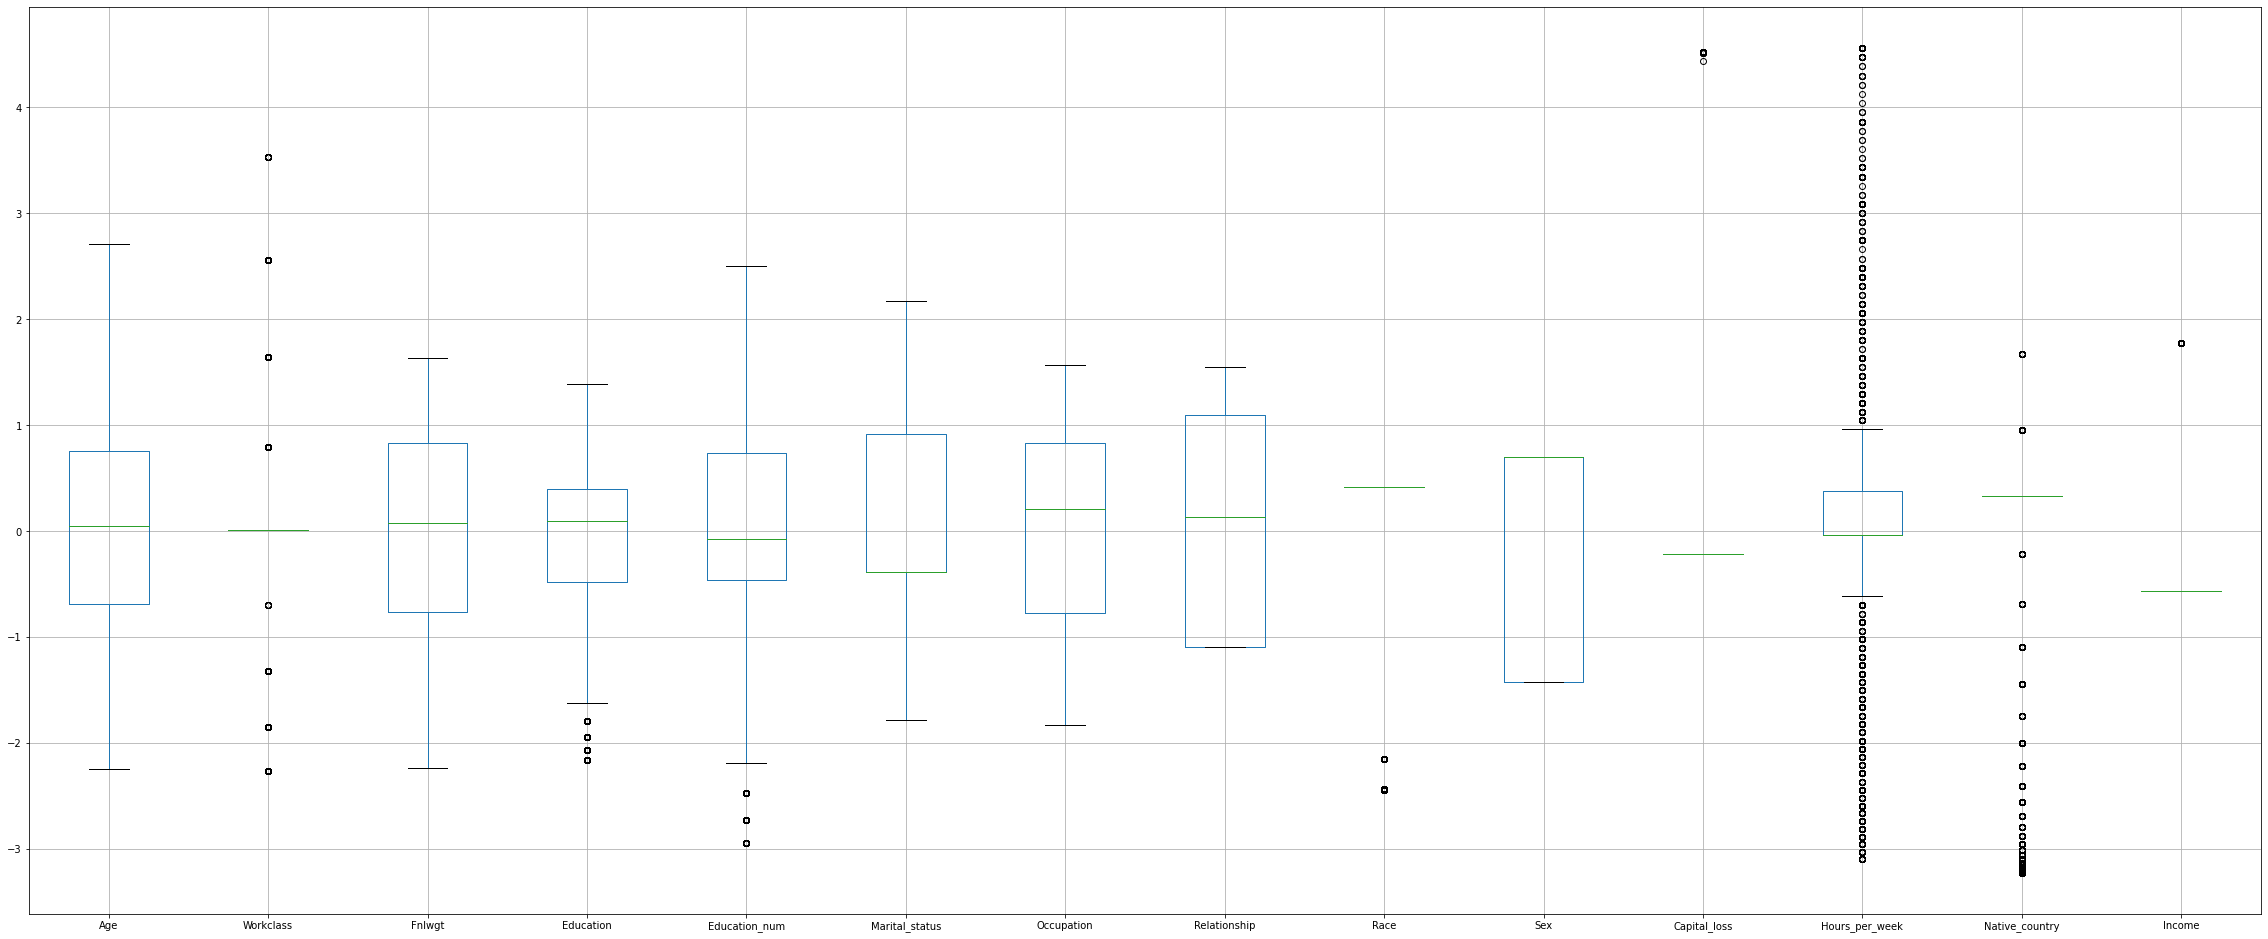

In [27]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64),
 array([13, 10, 10, ...,  8,  8, 10], dtype=int64))

In [29]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
5,32,4,8535,6,4,3,8,1,2,0,0,0,15,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,4,18559,15,9,4,11,1,4,1,0,0,39,39,0
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0


In [30]:
df_new_z.shape

(26735, 15)

# 
Dataset having new shape 26735 rows and 15 columns

In [31]:
data_loss = (26735-32560)/26735*100
data_loss

-21.787918458948944

In [32]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)  

Best accuracy is 0.9213759213759214 on Random_state 8


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 8)

In [36]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 92.13759213759214
[[5999    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 ...
 [   4    0    0 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [  31    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5999
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.0

In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 84.3980343980344
[[5472    0    1 ...    4    2   16]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [  21    0    0 ...    0    0    1]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5999
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00

In [39]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 91.87653562653563
[[5982    0    0 ...    0    1    2]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 ...
 [   3    0    0 ...    1    0    0]
 [   5    0    0 ...    0    0    0]
 [  29    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5999
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.0

In [40]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 92.12223587223588
[[5999    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 ...
 [   4    0    0 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [  31    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5999
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.0

In [41]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.9165233415233416


In [42]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.9146498771498772


In [43]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.9167383292383292


In [44]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [45]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [46]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

85.01228501228502


In [47]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9212223587223587

In [51]:
import joblib 
joblib.dump(GCV.best_estimator_,"CensusIncome.pkl")

['CensusIncome.pkl']